# Spam Filter Excersice 
## Steps
* Divide data into train and test sets
* Keep test data in a safe
* Transform test data (normalize, discretize, etc)
* Train model
* Transform test data with the parameters found in step 3
* Test model with test data
* Evaluate Results

In [127]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from scipy.stats import norm
from sklearn import preprocessing
import sklearn
from random import random
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv("spambase/spambase.data",header=None)

In [74]:
# This data does not have headers so each attribute or field is simply enumerated
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


## La muestra se divide en Training and Testing sets (cuatro en total)
<p> 1) Se construyen dos particiones de cada variable dependiente y dos particiones de la independiente</p>
<p> 2) Se suele usar un porcentaje de 75% al conjunto de entrenamiento (training) y un 25% al conjunto de prueba (testing)</p> 
<p> 3) En este ejemplo de regresión lineal se hace primero la regresión lineal de $\mathbf Y $ sobre $\mathbf X $ con la información correspondiente al 75% de la base total del grupo de entrenamiento selecciónado</p>
<p> 4) Despues se comparan los resultados predecidos con las variables independientes del grupo de prueba contra la variable de pendiente $\mathbf Y $ en el conjunto de prueba</p>
<p> Nota.- La librería train_test_split contiene un algoritmo para segmentar dataframes en los conjuntos de entrenamiento y prueba con la especificación de proporciones que se necesite </p>


In [75]:
# Here df.columns is a list of all the columns and df.columns[0:-1] is all columns minus the last which is y. 
# If the data had headers you could use column names: df[['column1','column2','etc']]
X_train, X_test, Y_train, Y_test = train_test_split(df[df.columns[0:-1]],df[df.columns[-1]], train_size=0.75)

Definimos los grupos de entrenamiento y prueba como arreglos numpy para poder utilizarlos posteriormento como vectores y no listas

In [76]:
# Separate both train and test as well as the response variable
index = np.array([ 1 if random()<.75 else 0 for i in range(len(df))])
X_train=np.array(df[df.columns[0:-1]])[index==1]
X_test=np.array(df[df.columns[0:-1]])[index==0]
Y_train=np.array(df[df.columns[-1]])[index==1]
Y_test=np.array(df[df.columns[-1]])[index==0]

Estandarizamos la base 

In [77]:
# Normalizar no ayuda mucho pero sale igual al de sklearn. Para que las alturas del pdf signifiquen lo mismo 
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

Calculamos media y varianza de las variables independientes por grupos

In [78]:
ms = np.mean(X_train[Y_train == 1],0)
sds = np.std(X_train[Y_train == 1],0)
mns = np.mean(X_train[Y_train == 0],0)
sdns = np.std(X_train[Y_train == 0],0)


In [79]:
X_train

array([[-0.33558337,  0.3168493 ,  0.71746117, ..., -0.04241456,
         0.04416094,  0.00631498],
       [-0.14939601, -0.16355162,  0.85586652, ...,  0.14460375,
         2.05822012,  3.27561428],
       [-0.33558337, -0.16355162, -0.54795914, ..., -0.04916758,
        -0.05559199, -0.13726353],
       ..., 
       [-0.33558337, -0.16355162, -0.54795914, ..., -0.11028386,
        -0.22659702, -0.42937155],
       [ 0.59535343, -0.16355162,  0.04520663, ..., -0.11494005,
        -0.21709674, -0.25773746],
       [ 2.6434144 , -0.16355162, -0.54795914, ..., -0.12286482,
        -0.22184688, -0.32375057]])

In [80]:
X_train[Y_train==1]

array([[-0.33558337,  0.3168493 ,  0.71746117, ..., -0.04241456,
         0.04416094,  0.00631498],
       [-0.14939601, -0.16355162,  0.85586652, ...,  0.14460375,
         2.05822012,  3.27561428],
       [-0.33558337, -0.16355162, -0.54795914, ..., -0.04916758,
        -0.05559199, -0.13726353],
       ..., 
       [ 0.87463447, -0.16355162, -0.54795914, ..., -0.0737436 ,
        -0.18384576, -0.33035188],
       [-0.33558337, -0.16355162,  0.97449968, ..., -0.0446039 ,
         0.04891108, -0.02669157],
       [-0.33558337,  0.06914258,  0.28247294, ..., -0.05197362,
         1.26494681,  1.20280261]])

# Prior Probabilities
<p> Por la regla de Bayes se tiene que $\mathbf  P(Spam|X) = \frac{P(X|Spam)*P(Spam)}{P(X)} $ </p>

### Calculo de P(Spam)

In [81]:
P_Spam=float(sum(Y_train)/len(Y_train))
P_NoSpam=1-P_Spam
print("Probabilidad Spam: ")
P_Spam


Probabilidad Spam: 


0.39376443418013857

### Calculo de P(X|Spam)
<p> El método consiste en separar el Spam del No Spam para calcular la media y desviación estandar de los dos grupos. </p>


In [130]:
mediaS=np.mean(X_train[Y_train==1], axis=0)
sdS=np.std(X_train[Y_train==1], axis=0)
mediaNS=np.mean(X_train[Y_train==0], axis=0)
sdNS=np.std(X_train[Y_train==0], axis=0)

<p> Se asume normalidad en los datos por lo que la funcion de distribución de éstos está caracterizada por su media y varianza. </p>

In [131]:
ndS=norm(mediaS, sdS)
ndNS=norm(mediaNS, sdNS)


Antes de empezar es necesario asegurar que se está trabajando con arreglos numpy

In [132]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [133]:
Y_test

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

Se identifica lo valores de X que corresponden a observaciones Spam y No Spam, en el grupo de entrenamiento

In [134]:
Values_Spam = np.array([X_train[i] for i in range (len(X_train)) if Y_train[i]==1])
Values_No_Spam = np.array([X_train[i] for i in range(len(X_train)) if Y_train[i]==0])
Ln_Spam = np.log(P_Spam)
Ln_NoSpam = np.log(P_NoSpam)

## Funcion Clasificadora 
### Compara la probabilidad de que sea spam vs no spam para cada observacion i

In [135]:
def ClasificadorSpamBayes(x):
    min = len(x)*10
    spam = Ln_Spam
    nospam = Ln_NoSpam
    for i in range(0,len(x)):
        normspam = norm(ms[i],sds[i]).pdf(x[i])
        normnospam=norm(mns[i],sdns[i]).pdf(x[i])
        if norm(ms[i],sds[i]).pdf(x[i])!=0:
            aux_spam = np.log(norm(ms[i],sds[i]).pdf(x[i]))
            spam = spam + aux_spam
        else:
            spam = spam +min
        if norm(mns[i],sdns[i]).pdf(x[i])!=0:
            aux_nospam = np.log(norm(mns[i],sdns[i]).pdf(x[i]))
            nospam = nospam + aux_nospam
        else:
            nospam=nospam+min
    return 1 if spam>nospam else 0


Probando la función clasificadora con el conjunto de prueba (testing set)

In [136]:
prediccion = []
for i in range (0,len(X_test)):
    prediccion.append(ClasificadorSpamBayes(X_test[i]))

## Matriz de Confusión (Confusion Matrix)
Medida de la calidad de la predicción usando la data de Y del conjunto de prueba

In [89]:
g = confusion_matrix(Y_test,prediccion)

In [90]:
print("Matriz de Confusión con aproximación manual : ")
g

Matriz de Confusión con aproximación manual : 


array([[261, 427],
       [ 33, 416]])

In [91]:
print("iteraciones : ")
i

iteraciones : 


1136

Usando la libreria GaussianNB debe dar un resultado muy parecido

In [92]:
Gau = GaussianNB()
Gau.fit(X_train,Y_train)
predicción=Gau.predict(X_test)
print(confusion_matrix(Y_test,prediccion))

[[261 427]
 [ 33 416]]


## Graficando la Curva ROC
<p> La curva ROC (Reciever Operatin Characteristic Curve) sirve para ilustrar la capacidad predictiva de un sistema de clasificación BINARIO.</p>
<p> Se crea al graficar la tasa de verdaderos positivos predecidos por el modelo (TPR) en el eje vertical (Y) contra la tasa de verdaderos negativos predecidos por el modelo (FPR) en el eje horizontal (X) </p>
<p> Generalmente junto con la curva ROC se grafica tambien la recta diagonal  $\mathbf x=y $ , que en este contexto implica que ambas tasas (verdadaderos positivos y falsos positivos) son iguales </p>
<p> Por otro lado, el punto de clasificación perfecta esta ubicado en el extremo superior izquierdo de la grafica</p>

* Definimos una función para graficarla

In [137]:
def GraficarCurvaRoc(Y_test,Y_pred):
    fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(fpr,tpr,lw=2, label = 'Roc Curve Naive Bayes', color= 'darkblue')
    plt.axis([-.04, 1.05, -.05, 1.05])
    for x in range(0,len(thresholds),100):
        a = round(thresholds[x],2)
        b = [fpr[x],tpr[x]]
        ax.annotate('(%s)'% a, xy=b, size='small', color = 'gray')    
    plt.title("Roc Curve Naive Bayes approach", color='darkred')
    plt.plot([-0.05, 1.5],[-0.05, 1.5], '--', color = (.6,.6,.6),label='Clasificación Aleatoria')
    plt.xlabel('FP', color = 'black')
    plt.ylabel('TP', color = "black")
    plt.legend(loc="upper left")
    plt.show()
   

    

Utilizamos la funcion clasificadora que definimos sobre los datos del conjunto de prueba forma vecotrial de definir la prediccion

In [138]:
Y_pred = [ClasificadorSpamBayes(x) for x in X_test]

## Comparando el resultado de la funcion clasificadora en el conjunto de datos de prueba

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.59542656112576953

In [140]:
confusion_matrix(Y_test, Y_pred)

array([[261, 427],
       [ 33, 416]])

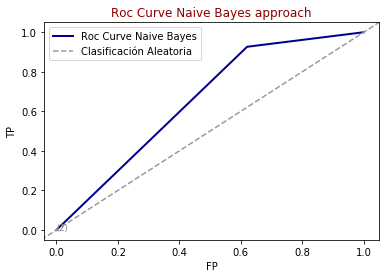

In [141]:
GraficarCurvaRoc(Y_test, Y_pred)